# Main Question

Determining if a game is **Hit** or **Flop** based on its global sales!

##  Complete Exploratory Data Analysis (EDA)

In [343]:
# Importing necessary packages!
import pandas as pd
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

In [344]:
RANDOM_SEED = 2023

In [345]:
# Importing or reading the dataset!
games_dataset = pd.read_csv("Dataset/Video_Games_Sales.csv")

In [346]:
# Printing out first five observations of the dataset, to which types of data or features we have in the dataset!
games_dataset.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [347]:
# Basic statistics measures of the dataset!
games_dataset.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [348]:
print(f"Number of features in the dataset is {games_dataset.shape[1]} and the number of observations/rows in the dataset is {games_dataset.shape[0]}")

Number of features in the dataset is 13 and the number of observations/rows in the dataset is 1907


In [349]:
games_dataset.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

* The features Year and Publisher contain missing values!  
* The feature *Year* has 29 missing values, so instead of dropping the observations, We're handling the missing values by imputations which means we are filling the missing values!  
* The feature *Publisher* has 2 missing values. I chose to drop the observations here instead of filling them in!  
    * The reasoning behind this is that it may not make sense to fill in the publisher name with the most common name or any other names!

In [350]:
# Column 'Year' has 29 missing values!
games_dataset['Year'] = games_dataset['Year'].fillna(games_dataset['Year'].mode()[0]) 
# mode() returns the most common values! Therefore we are filling the missing values in the column 'Year' with the most common value in this column!

print("Number of rows/observations before drop: ", games_dataset.shape[0])

# Using dropna() to drop observations that has missing values in the *Publisher* column!
# Also setting the argument *inplace* equals to *True* to make the changes explicitly into the dataset itself and not creating a new dataset!
games_dataset.dropna(subset=['Publisher'], inplace=True)

print("Number of rows/observations after drop: ", games_dataset.shape[0])

Number of rows/observations before drop:  1907
Number of rows/observations after drop:  1905


In [351]:
games_dataset.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

### Univariate analytical questions

**1.** How many games do we have in the Shooter genre?

In [352]:
# Counting the number of games published by each publisher!
num_shooter_games = (games_dataset['Genre'] == 'Shooter').sum()
print("The number of Shooter games in the dataset is: ", num_shooter_games)

The number of Shooter games in the dataset is:  206


**Reflection**  
I may expected the number of Shooter games be higher than 206 in the whole dataset!  
But it is kinda understandable because in the platform like Wii, there are not so many shooter games, there are most Sports games!

**2.** How many games have a review score between 50.0 and 80.0?

In [353]:
num_games_between_50_80 = ((games_dataset['Review'] <= 80.0) & (games_dataset['Review'] >= 50.0)).sum()
print("The number of games that have a review score between 50.0 and 80.0 is : ", num_games_between_50_80)

The number of games that have a review score between 50.0 and 80.0 is :  833


**Reflection**  
The result was expected because based on my experience in gaming industry, it is little bit challenging to get a informative review after building a game!  
In the whole dataset, the result shows that almost half of the games are quality games!

### Bivariate analytical questions

**1.** Which genre has the highest average review score?

In [354]:
average_rev_by_genre = games_dataset.groupby('Genre')['Review'].mean()
average_rev_by_genre

Genre
Action          78.953709
Adventure       81.480182
Fighting        82.138320
Misc            72.769874
Platform        78.384202
Puzzle          74.306818
Racing          78.105376
Role-Playing    83.913410
Shooter         81.079806
Simulation      73.811848
Sports          78.869218
Strategy        82.437250
Name: Review, dtype: float64

**Reflection:**  
The result was expected because RPG games are becoming more and more popular! The games like Cyberpunk 2077, or Final Fantasy 7!

**2.** How many games of each genre does Nintendo have?

In [355]:
allNintendoGames = games_dataset[games_dataset['Publisher'] == 'Nintendo']
nintendoGamesByGenre = allNintendoGames.groupby('Genre')['Game Title'].count()
nintendoGamesByGenre

Genre
Action          11
Adventure       31
Fighting         8
Misc            32
Platform        68
Puzzle          21
Racing          21
Role-Playing    38
Shooter         13
Simulation      13
Sports          31
Strategy         9
Name: Game Title, dtype: int64

**Reflection:**
The result was expected, because the Nintendo platform has a lot of Platformer games!

### Analytial questions answered through visualization

**1.** How many games are released each year?

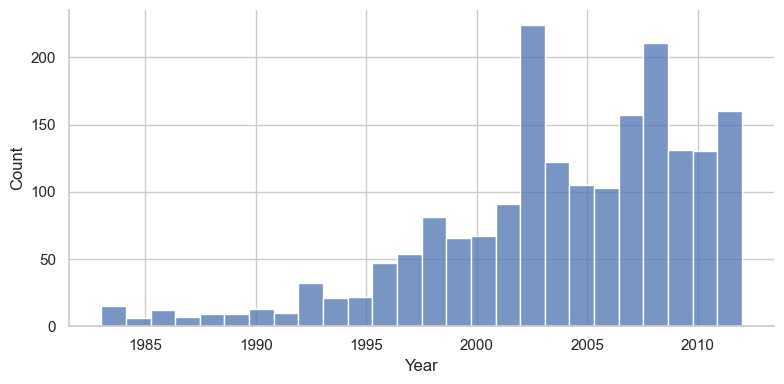

In [356]:
dt = sns.displot(data = games_dataset, x="Year", height=4,aspect=2)

**Reflection:**
The histogram is useful to have a quick view of how the number of released games has increased over years!  
But for exact numbers and years, a table would be more appropriate and easier to read!

**2.** Which genre of the game has sold the most in each region? The dataset contains data about four different regions, Europe, Japan, North America and rest of the world!

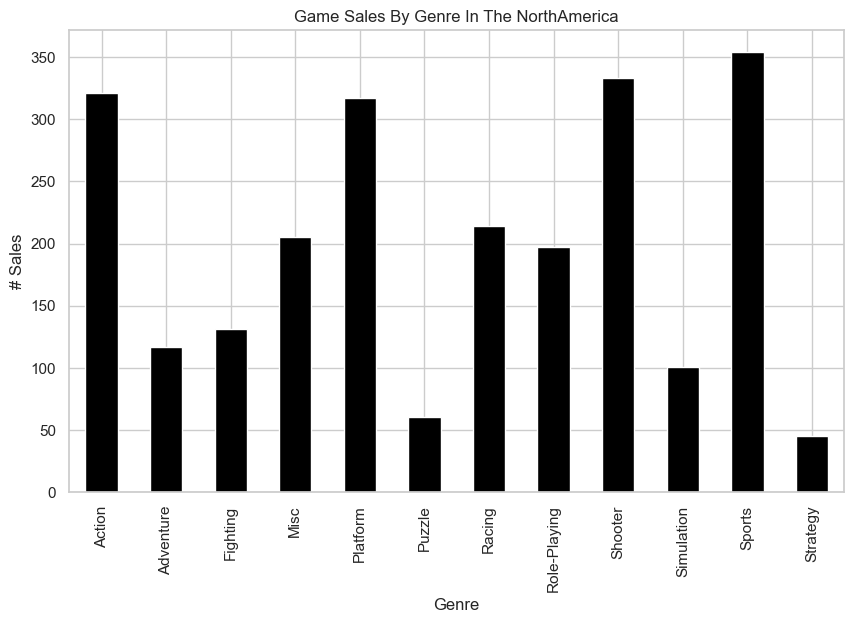

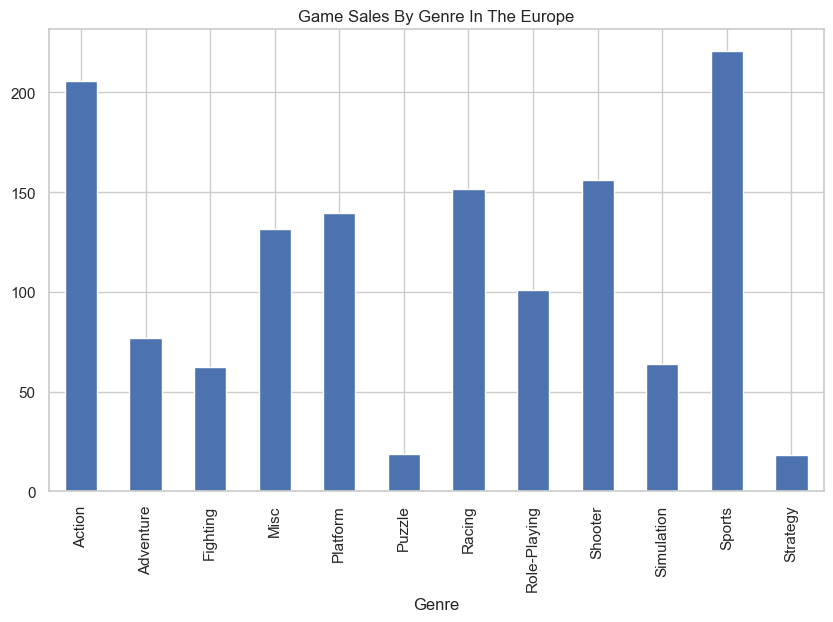

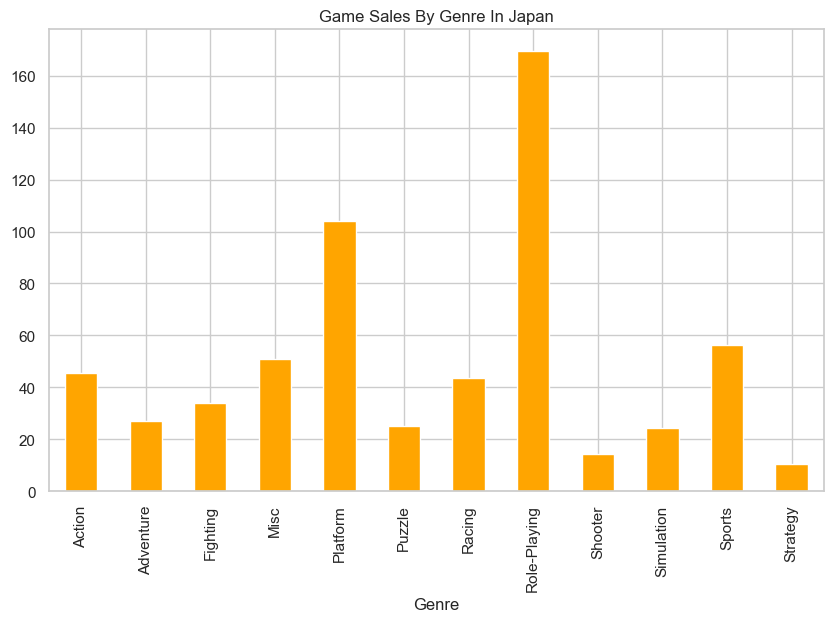

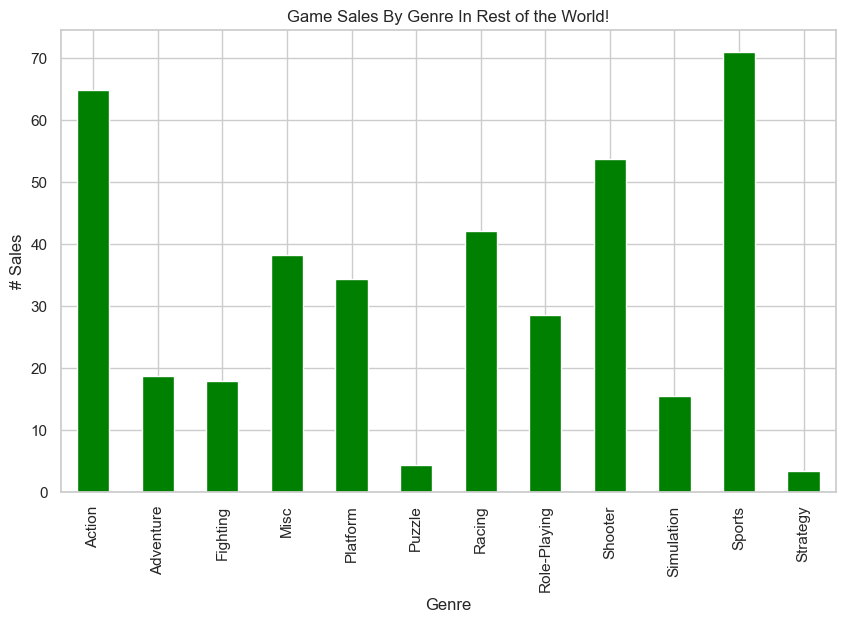

In [357]:
na_genre_sales = games_dataset.groupby('Genre')['North America'].sum()
europe_genre_sales = games_dataset.groupby('Genre')['Europe'].sum()
japan_genre_sales = games_dataset.groupby('Genre')['Japan'].sum()
rest_genre_sales = games_dataset.groupby('Genre')['Rest of World'].sum()
plt.figure(figsize=(10, 6))
na_genre_sales.plot(kind='bar', color='black', title="Game Sales By Genre In The NorthAmerica")
plt.ylabel("# Sales")
plt.figure(figsize=(10, 6))
europe_genre_sales.plot(kind='bar', title="Game Sales By Genre In The Europe")
plt.figure(figsize=(10, 6))
japan_genre_sales.plot(kind='bar', color= 'orange', title="Game Sales By Genre In Japan")
plt.figure(figsize=(10, 6))
rest_genre_sales.plot(kind='bar', color='green', title= "Game Sales By Genre In Rest of the World!")
plt.ylabel("# Sales")
plt.show()

**Reflection** The histograms are very useful here!
* In the North America the Sport genre has sold the most!
* In the Europe the Sport genre has sold the most!
* In Japan the Role-Playing genre has dominated the marknad!
* In other places the Sport genre has sold the most!

**3.** Which genre of games tends to have higher review scores in rest of the world? (i.e. not in Europe, nor in Japan, nor in North America)!

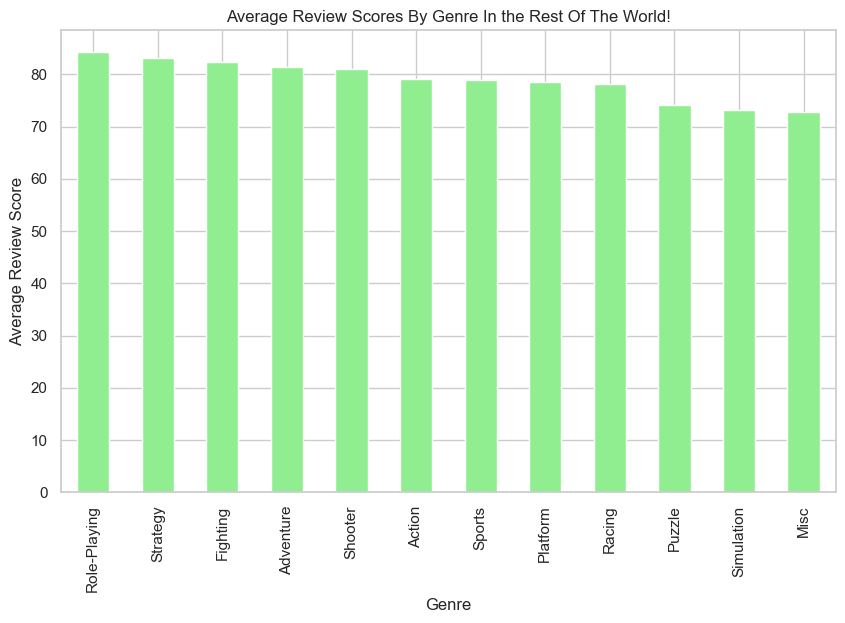

In [358]:
games_in_RoW = games_dataset[games_dataset['Rest of World'] > 0] # Games that has sold in the rest of the world, I have renamed the column to RestofWorld!
average_rev_scores_by_genre = games_in_RoW.groupby('Genre')['Review'].mean()
average_rev_scores_by_genre = average_rev_scores_by_genre.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_rev_scores_by_genre.plot(kind='bar', color="lightgreen", title='Average Review Scores By Genre In the Rest Of The World!')
plt.ylabel('Average Review Score')
plt.show()

* Average Review Scores of different genres in 'Rest of the World' are around 80! So we justify the y-axis to make the differences clearer!

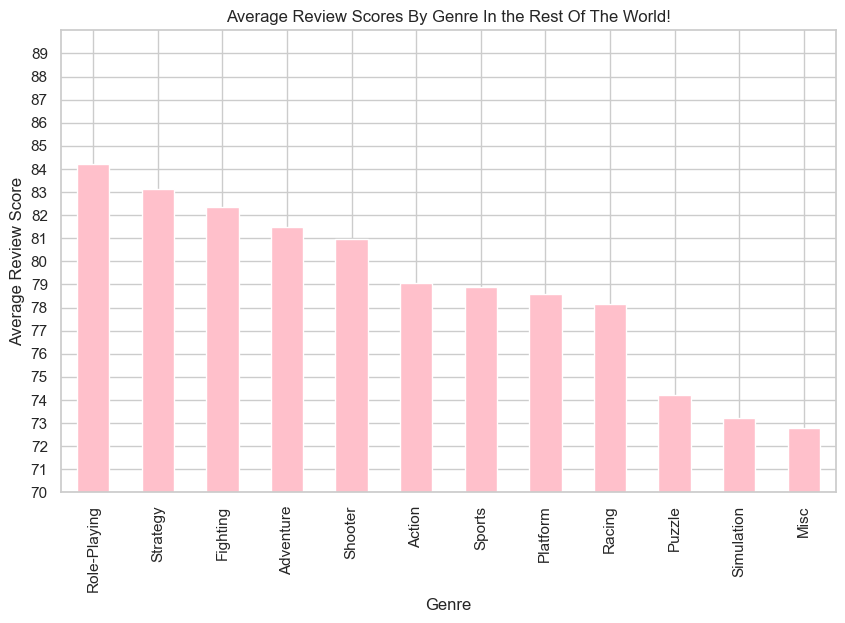

In [359]:
plt.figure(figsize=(10, 6))
average_rev_scores_by_genre.plot(kind='bar', color="pink", title='Average Review Scores By Genre In the Rest Of The World!')
plt.ylabel('Average Review Score')
plt.ylim(70, 90)
plt.yticks(range(70, 90, 1))
plt.show()

**Reflection:** After justifying the y-axis, is useful to see average review scores by genre in the rest of the world, and specially when the data is sorted!

**4.** In which year, each platform has the highest release?

In [360]:
games_by_year_and_platform = games_dataset.groupby(['Year', 'Platform'])
size_games_by_year_and_platform = games_by_year_and_platform.size()
size_games_by_year_and_platform

Year    Platform
1983.0  NES          6
1984.0  NES          9
1985.0  NES          6
1986.0  NES         12
1987.0  NES          7
                    ..
2012.0  PC           4
        PS3         21
        Wii          3
        WiiU         2
        X360        23
Length: 151, dtype: int64

In [361]:
size_games_by_year_and_platform = size_games_by_year_and_platform.reset_index() # Reseting the indexs to not dealing with MultiIndex
size_games_by_year_and_platform

,Year,Platform,0
0,1983.0,NES,6
1,1984.0,NES,9
2,1985.0,NES,6
3,1986.0,NES,12
4,1987.0,NES,7
...,...,...,...
146,2012.0,PC,4
147,2012.0,PS3,21
148,2012.0,Wii,3
149,2012.0,WiiU,2


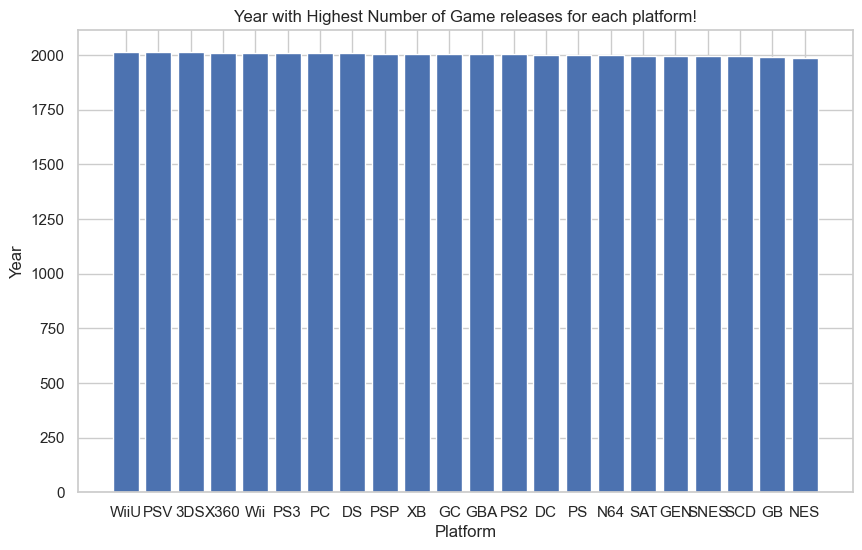

In [362]:
highest_release_year = size_games_by_year_and_platform.loc[size_games_by_year_and_platform.groupby('Platform')[0].idxmax()]
highest_release_year = highest_release_year.sort_index(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(highest_release_year['Platform'], highest_release_year['Year'])
plt.xlabel('Platform')
plt.ylabel('Year')
plt.title('Year with Highest Number of Game releases for each platform!')
plt.show()

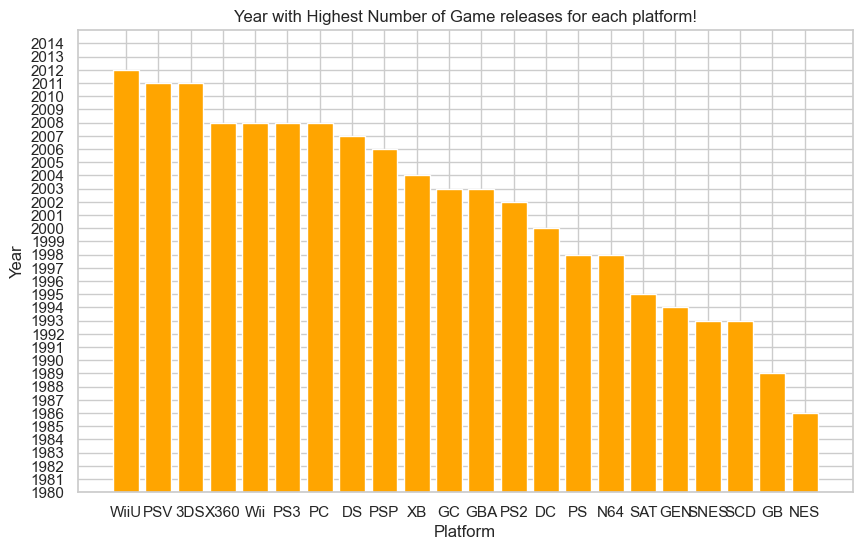

In [363]:
# The values or years are around 2000 so therefore we are adjusting now the y-axis to make the visualization and the differences between years more obvious!
plt.figure(figsize=(10, 6))
plt.bar(highest_release_year['Platform'], highest_release_year['Year'], color="orange")
plt.xlabel('Platform')
plt.ylabel('Year')
plt.title('Year with Highest Number of Game releases for each platform!')
plt.ylim(1980, 2015)
plt.yticks(range(1980, 2015, 1))
plt.show()

**Reflection:** After justifying the y-axis, is useful to see years with highest number of games released for each platform!

### Correlation

* Correlation is only for numerical variables! So we start by filtering out the other variables! (String ones!)

In [364]:
games_dataset_numerical = games_dataset[['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global', 'Review']]
games_dataset_numerical.head()

,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
0,1,2006.0,40.43,28.39,3.77,8.54,81.12,76.28
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,91.00
2,3,2008.0,14.50,12.22,3.63,3.21,33.55,82.07
3,4,2009.0,14.82,10.51,3.18,3.01,31.52,82.65
4,5,1989.0,23.20,2.26,4.22,0.58,30.26,88.00


**Q.** Which variable/feature correlates the most with the review score?

In [365]:
corr_matrix = games_dataset_numerical.corr(method='pearson')
corr_matrix

,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
Rank,1.000000,0.104048,-0.480632,-0.466440,-0.359207,-0.436583,-0.529447,-0.292459
Year,0.104048,1.000000,-0.072131,0.082680,-0.275882,0.199397,-0.049864,0.010267
North America,-0.480632,-0.072131,1.000000,0.720759,0.416777,0.693670,0.933071,0.175582
Europe,-0.466440,0.082680,0.720759,1.000000,0.402371,0.922647,0.888907,0.129589
Japan,-0.359207,-0.275882,0.416777,0.402371,1.000000,0.308917,0.591794,0.148736
Rest of World,-0.436583,0.199397,0.693670,0.922647,0.308917,1.000000,0.837499,0.138064
Global,-0.529447,-0.049864,0.933071,0.888907,0.591794,0.837499,1.000000,0.181766
Review,-0.292459,0.010267,0.175582,0.129589,0.148736,0.138064,0.181766,1.000000


* Based on the table we can say that Global feature correlates the most with the Review score! But we can also check this answer by the following way:

In [366]:
rev_corr = corr_matrix['Review'] #Getting the Review column!
sorted_rev_corr = rev_corr.sort_values(ascending=False) #Sorting in descending order!
sorted_rev_corr # The first variable/feature has the highest correlation with the Review score!

Review           1.000000
Global           0.181766
North America    0.175582
Japan            0.148736
Rest of World    0.138064
Europe           0.129589
Year             0.010267
Rank            -0.292459
Name: Review, dtype: float64

* Let's visualize this correlation to see if there is a linear trend between them!

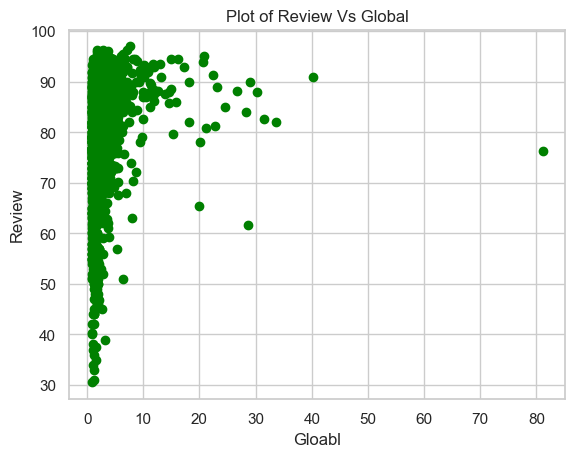

In [367]:
plt.scatter(games_dataset_numerical["Global"], games_dataset_numerical["Review"], color="green")
plt.xlabel("Gloabl")
plt.ylabel("Review")
plt.title("Plot of Review Vs Global")
plt.show()

**Gloabl variable/feature** has the highest correlation with **Review Score**!  
However, the scatterplot doesn't show a clear linear trend! This suggests that the relationship between **Gloabl Score** and **Review Score** is **NOT** linear,  
or that other factors are influencing **Review Score**!  

Correlation does **NOT** imply causation!  
Even if **Gloabl Score** is correlated with **Review Score**, it doesn't mean it causes changes in **Review Score**.  
There could be other variables in the dataset that influence **Review Score**!

## Preparing the data for ML classification

### Feature Selection

**Target Class:** *Global* sales feature for predicting if a game has been successfull or not. 'Hit' or 'Flop'!  

Creating a new column in the dataset called 'Hit'. It has a value of 1 or 0 for 'Hit' or 'Flop'!  

For most games selling 3.5K - 5K copies worldwide within 18 months is a solid success, according to "Boardgameweek.com",  
but for this dataset I'm taking the mean of the global sales as the threshold!  

Threshold I'm choosing for the target class is 2.5 which means games with global sales equals or above 6 are considered to be 'Hit' otherwise 'Flop'!  

In [368]:
threshold = games_dataset['Global'].mean()
print(games_dataset['Global'].mean())
# Creating a new column 'Hit'
games_dataset['Hit'] = games_dataset['Global'].apply(lambda x: 1 if x >= threshold else 0)

2.4895118110236223


In [369]:
games_dataset.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Hit
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,1
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,1
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,1
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,1
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,1


In [370]:
games_dataset['Hit'].value_counts() # We have class imbalanced here!

Hit
0    1415
1     490
Name: count, dtype: int64

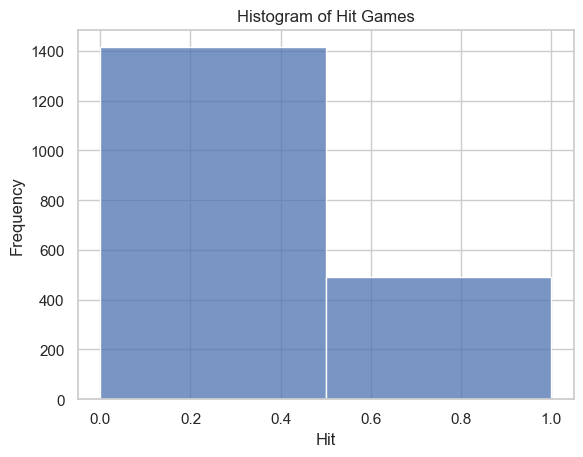

In [371]:
sns.set(style='whitegrid') #Set the style of seaborn for the plot!
fig, ax = plt.subplots() #Create a figure and axis for the plot!
sns.histplot(games_dataset['Hit'], bins=2, ax=ax) #Plotting the histogram using seaborn
# Set the title and labels
ax.set_title('Histogram of Hit Games')
ax.set_xlabel('Hit')
ax.set_ylabel('Frequency')
# Show the plot
plt.show()

* The model trained on this dataset might be biased towards predicting the majority class, because it could achieve a seemingly high accuracy just by predicting the majority class  
all the time!  

* My first try: Building an initial model and testing the model on this dataset and then checking the results! If the model is not performing well on the minority class  
I'll apply techniques such as resampling or SMOTE.  

**Input features**

The features that I have chosen as input features are: *‘Year’, 'Review'* and *‘Genre’*!  

**Question: Why were other features not chosen?**
* **Data Leakage:** The *‘North America’, ‘Europe’, ‘Japan’*, and *‘Rest of World’* features are components of the *‘Global’* sales!  
* **Feature Importance:** The feature *'Rank'* or *'Game Title'* don't seem to be very relevant for answering the main question!  


In [372]:
games_dataset_new = games_dataset[['Year', 'Review','Hit']]
games_dataset_new.head()

,Year,Review,Hit
0,2006.0,76.28,1
1,1985.0,91.00,1
2,2008.0,82.07,1
3,2009.0,82.65,1
4,1989.0,88.00,1


**One-Hot encoding on categorical features**

In [373]:
genre_encoded = pd.get_dummies(games_dataset['Genre'])
games_dataset_new = pd.concat([games_dataset_new, genre_encoded], axis=1)

games_dataset_new.head()


,Year,Review,Hit,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2006.0,76.28,1,False,False,False,False,False,False,False,False,False,False,True,False
1,1985.0,91.00,1,False,False,False,False,True,False,False,False,False,False,False,False
2,2008.0,82.07,1,False,False,False,False,False,False,True,False,False,False,False,False
3,2009.0,82.65,1,False,False,False,False,False,False,False,False,False,False,True,False
4,1989.0,88.00,1,False,False,False,False,False,True,False,False,False,False,False,False


In [384]:
data_X = games_dataset_new.drop('Hit', axis=1) #All columns except 'Hit'! (Input features)
data_y = games_dataset_new['Hit'] #Target class

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=RANDOM_SEED, stratify=data_y)

**Stratify** maintains the same distribution of classes in both training and test sets!  
In other words, it ensures that the train and test sets have the same proportion of class labels as the input dataset!  
In the dataset 75% (approximately) of the data is of class ‘0’ or 'flop' and 25% (approximately) is of class ‘1’ or 'hit', stratification ensures that both your training and test sets maintain this 75:25 ratio!  

* Adding *Stratify* can result in a more robust and generalizable model!  
* *Stratification* ensures that the minority class is adequately represented in both training and test sets, leading to more reliable evaluation metrics!

* **A dictionary with 10 classifiers**

In [385]:
classifiers = {
    'DT1': DecisionTreeClassifier(max_depth=5),
    'DT2': DecisionTreeClassifier(max_depth=10),
    'RF1': RandomForestClassifier(n_estimators=50),
    'RF2': RandomForestClassifier(n_estimators=100),
    'KNN1': KNeighborsClassifier(n_neighbors=1),
    'KNN2': KNeighborsClassifier(n_neighbors=7),
    'SVM1': SVC(kernel='linear', C=1),
    'SVM2': SVC(kernel='rbf', C=1),
    'LR1': LogisticRegression(solver='liblinear'),
    'LR2': LogisticRegression(solver='saga'),
    'NB1': MultinomialNB(alpha=1.0),
    'NB2': MultinomialNB(alpha=0.5)
}

* **Experimental Evaluation**

In [386]:
results = pd.DataFrame({
                "classifier_name": [],
                "training_time": [],
                "prediction_time": [],
                "accuracy": [],
                "precision": [],
                "recall": [],
                "f1": []
                })

In [387]:
def gettingMeasures():
    results = None
    # Apply the classifier in each dataset
    for name, classifier in classifiers.items():

        # Start measuring the training time
        t_start = time.time()
        # The code below applies the specific classifier from the loop on the data
        classifier.fit(X_train,y_train)
        # Stop measuring training time
        t_end = time.time()
        # Calculate Variable of interest `training_time`
        training_time = t_end - t_start
        #######

        # Start measuring the prediction time
        t_start = time.time()
        # Predict on test set
        y_predicted = classifier.predict(X_test)
        # Stop measuring prediction time
        t_end = time.time()
        # Calculate Variable of interest `prediction_time`
        prediction_time = t_end - t_start
        #######


        # Get performance metrics
        accuracy_result = accuracy_score(y_test, y_predicted)
        precision_result = precision_score(y_test, y_predicted)
        recall_result = recall_score(y_test, y_predicted)
        f1_result = f1_score(y_test, y_predicted)
        #######


        #### Generate the results to populate the pandas.DataFrame
        this_result = pd.DataFrame({
                        "classifier_name": [name],
                        "training_time": [training_time],
                        "prediction_time": [prediction_time],
                        "accuracy": [accuracy_result],
                        "precision": [precision_result],
                        "recall": [recall_result],
                        "f1": [f1_result]
                        })
        # Append to the main dataframe with the results
        results = pd.concat([results, this_result], axis=0, ignore_index=True)
    return results

In [ ]:
results1 = gettingMeasures() # (For the third question) For the initial proportion 80/20 (Train/Test)

In [ ]:
results2 = gettingMeasures() # (For the third question) After changing the proportion 70/30 (Train/Test)

In [383]:
results1

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT1,0.002001,0.000999,0.774278,0.714286,0.204082,0.317460
1,DT2,0.002506,0.000000,0.740157,0.490909,0.275510,0.352941
2,RF1,0.054698,0.002503,0.755906,0.533333,0.408163,0.462428
3,RF2,0.106122,0.004516,0.734908,0.481013,0.387755,0.429379
4,KNN1,0.002000,0.005516,0.695538,0.406250,0.397959,0.402062
5,KNN2,0.002000,0.005663,0.779528,0.634615,0.336735,0.440000
6,SVM1,0.037805,0.003002,0.745407,0.521739,0.122449,0.198347
7,SVM2,0.016657,0.013070,0.742782,0.000000,0.000000,0.000000
8,LR1,0.001000,0.001000,0.758530,0.650000,0.132653,0.220339
9,LR2,0.014015,0.000000,0.742782,0.000000,0.000000,0.000000


In [389]:
results2

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT1,0.002000,0.000503,0.774476,0.704545,0.210884,0.324607
1,DT2,0.002014,0.000505,0.725524,0.441860,0.258503,0.326180
2,RF1,0.050774,0.002502,0.744755,0.504950,0.346939,0.411290
3,RF2,0.098790,0.005000,0.736014,0.481481,0.353741,0.407843
4,KNN1,0.001107,0.009001,0.680070,0.376712,0.374150,0.375427
5,KNN2,0.002000,0.008504,0.776224,0.637681,0.299320,0.407407
6,SVM1,0.027843,0.004000,0.756993,0.590909,0.176871,0.272251
7,SVM2,0.014332,0.016732,0.743007,0.000000,0.000000,0.000000
8,LR1,0.001000,0.001000,0.758741,0.628571,0.149660,0.241758
9,LR2,0.012676,0.000000,0.743007,0.000000,0.000000,0.000000


### Analytical Questions

**1. How does the training time vary across different classifiers?**  

Between these classifiers the one with the highest training time is *RandomForestClassifier* with *100 estimators*!  
If a model takes significantly longer to train, it might not be feasible for large datasets or real-time applications!  

**2. Which classifier has the highest F1 score on the test set?**  

For **imbalanced target class** that we have here, **F1 Score** is more important than **accuracy** measure!  
A higher F1 score indicates a better balance between precision and recall, which is crucial for imbalanced datasets!  
The *RandomForestClassifiers* between all other classifiers have the highest **F1 Score**!  

**3. How does the performance of the classifiers change when the proportion of the training and testing split changes (e.g., from 80/20 to 70/30 or 60/40)?**  

The measures don't significantly varies with different splits, it is only one indicator that models not underfitting/overfitting!  
A robust model should maintain relatively consistent performance across different splits!  

**Which classification model seems to perform better in your data?  Would you deploy it in a real-life task? Why or why not?**

Upon evaluating the performance metrics of various classifiers on my dataset, I’ve decided to select the model that exhibits relatively high precision and F1 score,  
despite its longer training time. These metrics are particularly important for my task due to the imbalanced nature of my classes.  

However, I would hesitate to deploy this model in a real-life scenario without further investigation. The class imbalance in my dataset is a significant concern,  
as it could potentially bias the model’s predictions. Therefore, before considering deployment,  
I would explore techniques to address this imbalance, such as resampling methods or adjusting the decision threshold!  